In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Read the original data
df = pd.read_excel('C:\\Users\\GHAGHRE\\Desktop\\warehouse_data.xlsx')

In [4]:
df.head()

,Product Family,Sum of count of orders,Avg product weight in Kg
0,agro industry and commerce,212,5.263405
1,foods,510,0.923415
2,food drinks,278,1.307933
3,Arts,209,1.691764
4,arts and crafts,24,1.164579


In [5]:
df.shape

(73, 3)

In [6]:
# Step 2: Standardize the Data
features = df[['Sum of count of orders', 'Avg product weight in Kg']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\GHAGHRE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


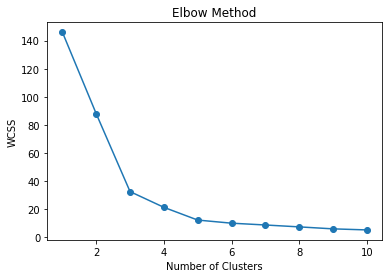

In [9]:
# Step 3: Choose the Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Step 4: Apply K-Means Clustering (assuming 3 clusters based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [11]:
# Step 5: Interpret the Results
print(df)

                Product Family  Sum of count of orders  \
0   agro industry and commerce                     212   
1                        foods                     510   
2                  food drinks                     278   
3                         Arts                     209   
4              arts and crafts                      24   
..                         ...                     ...   
68   sinalizacao and seguranca                     199   
69   printed tablets or imagem                      83   
70                   telephony                    4545   
71             fixed telephone                     264   
72          domestic utilities                    6964   

    Avg product weight in Kg  Cluster  
0                   5.263405        0  
1                   0.923415        0  
2                   1.307933        0  
3                   1.691764        0  
4                   1.164579        0  
..                       ...      ...  
68                  2.9

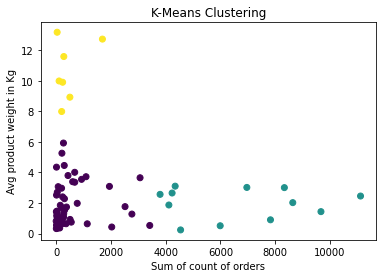

In [12]:
# Optionally, visualize the clusters
plt.scatter(df['Sum of count of orders'], df['Avg product weight in Kg'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Sum of count of orders')
plt.ylabel('Avg product weight in Kg')
plt.show()

In [14]:
# Step 5: Display the classified products in a tabular form
classification = df[['Product Family', 'Cluster']]

# Step 6: Count the number of products in each cluster
cluster_counts = classification['Cluster'].value_counts().sort_index()

# Print the results
print("Classified Products:\n", classification)
print("\nCluster Counts:\n", cluster_counts)


Classified Products:
                 Product Family  Cluster
0   agro industry and commerce        0
1                        foods        0
2                  food drinks        0
3                         Arts        0
4              arts and crafts        0
..                         ...      ...
68   sinalizacao and seguranca        0
69   printed tablets or imagem        0
70                   telephony        1
71             fixed telephone        0
72          domestic utilities        1

[73 rows x 2 columns]

Cluster Counts:
 0    54
1    12
2     7
Name: Cluster, dtype: int64
